Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv("haberman.data",header=None)
data.columns = ['X1','X2','X3','Y']

In [3]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [4]:

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
p=PCA(n_components=2)
p.fit(X)
X=p.transform(X)


In [7]:
X = pd.DataFrame(X,columns=['X1','X2'])



For split  80.0  -  20.0

For k= 1
L1 score =  0.7419354838709677
L2 score =  0.7258064516129032

For k= 2
L1 score =  0.7580645161290323
L2 score =  0.7741935483870968

For k= 3
L1 score =  0.6935483870967742
L2 score =  0.7096774193548387

For k= 4
L1 score =  0.7419354838709677
L2 score =  0.7580645161290323

For k= 5
L1 score =  0.6935483870967742
L2 score =  0.7096774193548387


For split  60.0  -  40.0

For k= 1
L1 score =  0.7154471544715447
L2 score =  0.6747967479674797

For k= 2
L1 score =  0.7560975609756098
L2 score =  0.7723577235772358

For k= 3
L1 score =  0.7154471544715447
L2 score =  0.7317073170731707

For k= 4
L1 score =  0.7398373983739838
L2 score =  0.7398373983739838

For k= 5
L1 score =  0.7073170731707317
L2 score =  0.6910569105691057


For split  70.0  -  30.0

For k= 1
L1 score =  0.717391304347826
L2 score =  0.6956521739130435

For k= 2
L1 score =  0.75
L2 score =  0.7608695652173914

For k= 3
L1 score =  0.6630434782608695
L2 score =  0.684782608695652

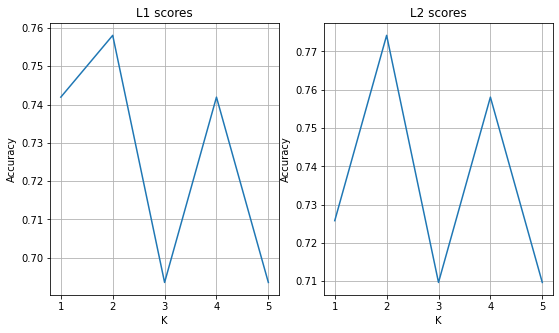

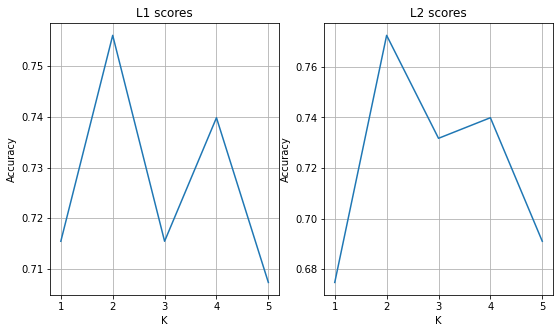

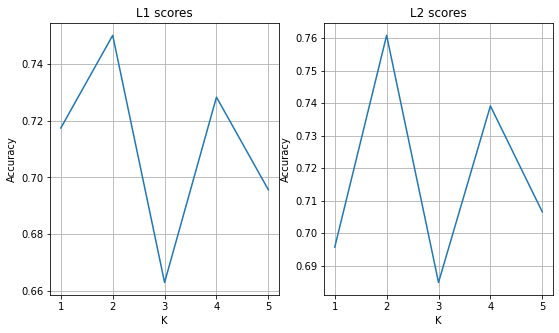

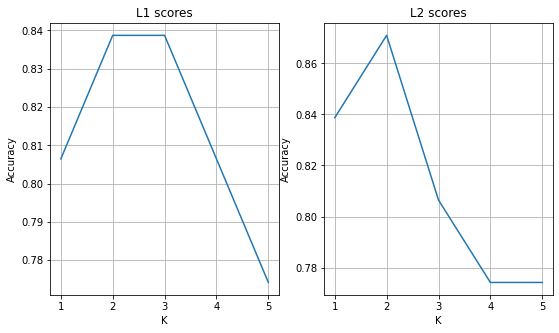

In [13]:
K=[1,2,3,4,5]

for size in [0.2,0.4,0.3,0.1]:
  l1_score = []
  l2_score = []
  print("\n\nFor split ",(1-size)*100," - ",size*100)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=49)
  for k in K:
    print("\nFor k=",k)
    for mtr in ['l1','l2']:
      clf = KNeighborsClassifier(n_neighbors = k, metric = mtr)
      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test)
      if mtr=='l1':
        l1_score.append(score)
        print('L1 score = ',score)
      else:
        l2_score.append(score)
        print('L2 score = ',score)

  fig,ax = plt.subplots(1,2,figsize=(9,5))
  ax[0].plot(K,l1_score)
  ax[0].grid()
  ax[0].set_title('L1 scores')
  ax[0].set_xlabel('K')
  ax[0].set_ylabel('Accuracy')

  ax[1].plot(K,l2_score)
  ax[1].grid()
  ax[1].set_title('L2 scores')
  ax[1].set_xlabel('K')
  ax[1].set_ylabel('Accuracy')

In [15]:
print(p.components_)

[[-0.70131829 -0.57789155  0.41736555]
 [ 0.01153822  0.57621082  0.81721965]]


Q2

In [16]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)
df=df.frame


In [19]:
s = StandardScaler()
s.fit(df)
df = s.transform(df)
p2=PCA(n_components=2)
p2.fit(df)
df2=p2.transform(df)

In [20]:
df2 = pd.DataFrame(df2,columns = ['X1','X2'])

In [21]:
data = df2.copy()
data1 = df2.copy()

In [25]:
from sklearn.cluster import KMeans
for k in range(2,6):
  # df=df.to_numpy()
  kmeans = KMeans(n_clusters=k, random_state=49, n_init="auto", tol=1e-3).fit(data)
  data[f'labels{k}'] = kmeans.labels_

In [26]:
data

X1        X2  labels2  labels3  labels4  labels5
0      2.346543  0.346441        0        0        0        0
1      1.761367  0.438124        0        0        0        0
2      2.330312 -0.126208        0        0        0        0
3      1.537078 -0.810004        0        0        0        0
4      1.416914 -1.121116        0        0        0        0
...         ...       ...      ...      ...      ...      ...
20635  0.602464 -2.251757        0        0        0        0
20636  1.264302 -1.815928        0        0        0        0
20637  0.687380 -2.056770        0        0        0        0
20638  0.828435 -2.073240        0        0        0        0
20639  0.771440 -1.832743        0        0        0        0

[20640 rows x 6 columns]

In [27]:
data['labels2'] = pd.Categorical(data.labels2)
data['labels3'] = pd.Categorical(data.labels3)
data['labels4'] = pd.Categorical(data.labels4)
data['labels5'] = pd.Categorical(data.labels5)

<AxesSubplot:xlabel='X1', ylabel='X2'>

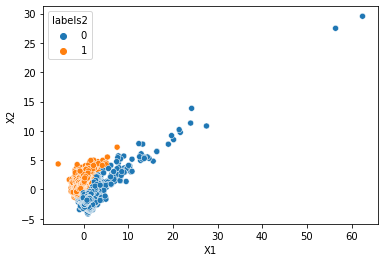

In [32]:
sns.scatterplot(data=data, x="X1", y="X2", hue = 'labels2')

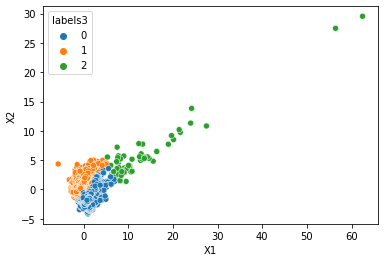

In [33]:
sns.scatterplot(data=data, x="X1", y="X2", hue = 'labels3');

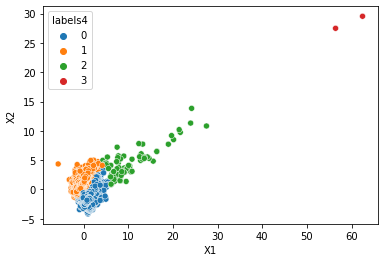

In [39]:
sns.scatterplot(data=data, x="X1", y="X2", hue = 'labels4');

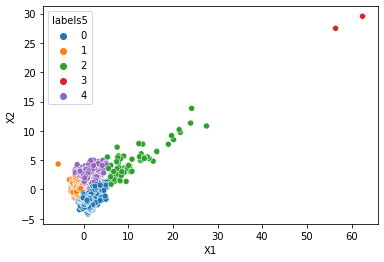

In [40]:
sns.scatterplot(data=data, x="X1", y="X2", hue = 'labels5');

In [35]:
!pip install mlinsights
from mlinsights.mlmodel import KMeansL1L2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 KB 11.5 MB/s eta 0:00:00


In [37]:
for k in range(2,6):
    kmeans = KMeansL1L2(k, norm='L1',tol = 1e-3,random_state = 49).fit(df)
    data1[f'labels{k}'] = kmeans.labels_

In [38]:
data1

X1        X2  labels2  labels3  labels4  labels5
0      2.346543  0.346441        1        0        3        3
1      1.761367  0.438124        1        0        3        3
2      2.330312 -0.126208        1        0        3        3
3      1.537078 -0.810004        1        0        3        3
4      1.416914 -1.121116        1        0        3        3
...         ...       ...      ...      ...      ...      ...
20635  0.602464 -2.251757        1        0        1        1
20636  1.264302 -1.815928        1        0        1        1
20637  0.687380 -2.056770        1        0        1        1
20638  0.828435 -2.073240        1        0        1        1
20639  0.771440 -1.832743        1        0        1        1

[20640 rows x 6 columns]

In [41]:
data1['labels2'] = pd.Categorical(data1.labels2)
data1['labels3'] = pd.Categorical(data1.labels3)
data1['labels4'] = pd.Categorical(data1.labels4)
data1['labels5'] = pd.Categorical(data1.labels5)

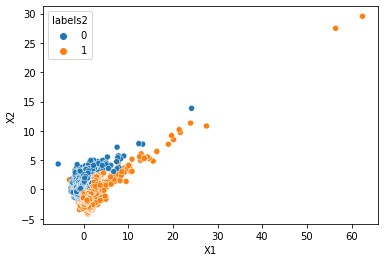

In [43]:

sns.scatterplot(data=data1, x="X1", y="X2", hue = 'labels2');

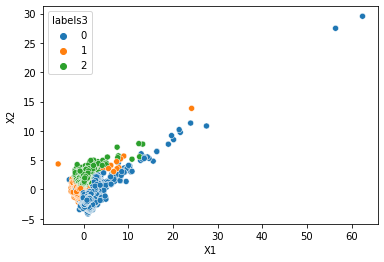

In [44]:
sns.scatterplot(data=data1, x="X1", y="X2", hue = 'labels3');

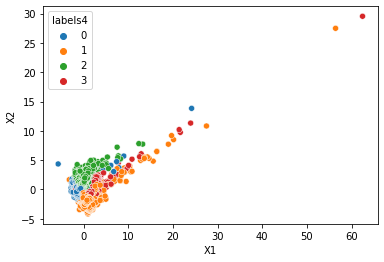

In [45]:
sns.scatterplot(data=data1, x="X1", y="X2", hue = 'labels4');

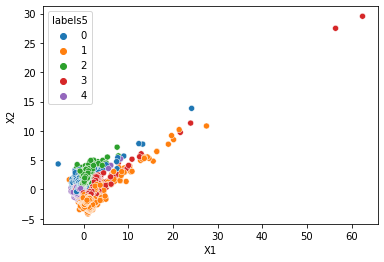

In [46]:
sns.scatterplot(data=data1, x="X1", y="X2", hue = 'labels5');

In [47]:
p3=PCA(n_components=3)
p3.fit(df)
df1=p3.transform(df)

In [49]:
df3 = pd.DataFrame(df1,columns = ['X1','X2','X3'])

In [50]:
data = df3.copy()
data1 = df3.copy()

In [51]:
from sklearn.cluster import KMeans
for k in range(2,6):
  kmeans = KMeans(n_clusters=k, random_state=49, n_init="auto", tol=1e-3).fit(data)
  data[f'labels{k}'] = kmeans.labels_

In [56]:
data

X1        X2        X3  labels2  labels3  labels4  labels5
0      2.346543  0.346441 -3.028503        0        0        3        4
1      1.761367  0.438124 -2.151692        0        0        3        4
2      2.330312 -0.126208 -2.236715        0        0        3        4
3      1.537078 -0.810004 -2.019956        0        0        0        0
4      1.416914 -1.121116 -1.493024        0        0        0        0
...         ...       ...       ...      ...      ...      ...      ...
20635  0.602464 -2.251757  0.910737        0        0        0        0
20636  1.264302 -1.815928  1.016440        0        0        0        0
20637  0.687380 -2.056770  0.948383        0        0        0        0
20638  0.828435 -2.073240  0.954093        0        0        0        0
20639  0.771440 -1.832743  0.880292        0        0        0        0

[20640 rows x 7 columns]

In [53]:
for k in range(2,6):
    kmeans = KMeansL1L2(k, norm='L1',tol = 1e-3,random_state = 49).fit(df)
    data1[f'labels{k}'] = kmeans.labels_

In [55]:
data1

X1        X2        X3  labels2  labels3  labels4  labels5
0      2.346543  0.346441 -3.028503        1        0        3        3
1      1.761367  0.438124 -2.151692        1        0        3        3
2      2.330312 -0.126208 -2.236715        1        0        3        3
3      1.537078 -0.810004 -2.019956        1        0        3        3
4      1.416914 -1.121116 -1.493024        1        0        3        3
...         ...       ...       ...      ...      ...      ...      ...
20635  0.602464 -2.251757  0.910737        1        0        1        1
20636  1.264302 -1.815928  1.016440        1        0        1        1
20637  0.687380 -2.056770  0.948383        1        0        1        1
20638  0.828435 -2.073240  0.954093        1        0        1        1
20639  0.771440 -1.832743  0.880292        1        0        1        1

[20640 rows x 7 columns]